# <center> <img src="figs/logo_facens.png" alt="Logo Facens" width="110" align="left"/>  <br/> <center>Facens<br/>
</p>

<br/>
  
<font size="3"><center>Prof. Julio Cesar Mastrodomenico</center></font>




# Aprendizado de Máquinas
### 2022PGS2M1
----

## <center> Métodos de Ensemble </center>

Implementação e utilização de Métodos de Ensemble

<img src="figs/ensemble.png" width="500" height="500" />

Banco de dados:
- Social Ads Network
- Iris
- Data3
- Titanic
- Digits
- Breast Cancer
- Data_cancer

### Exercícios

## 1) Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
import random
from sklearn.pipeline import Pipeline
from glob import glob
from tqdm.notebook import tqdm

# Nossas ferramentas
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score

# Nossos Algoritmos
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

## 2) Primeiro exercício e visualização da superfície de decisão
-----------------------

### Random Forest Classifier

In [2]:
# Exercicio com o dataset 2D, Social Network Ads
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [6]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [7]:
y_pred = classifier.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 5 27]]


0.91

### Visualização

C:\Users\vhst1\AppData\Local\Temp\ipykernel_6940\890656998.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


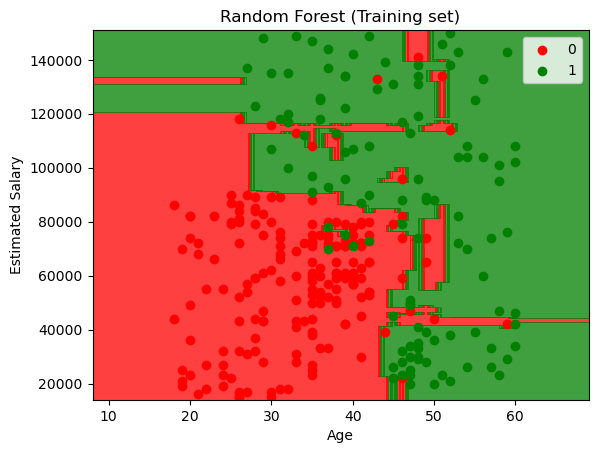

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\vhst1\AppData\Local\Temp\ipykernel_6940\2810044751.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


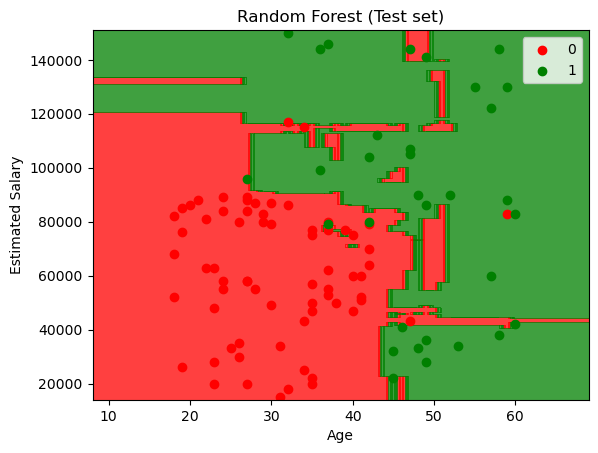

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Adaboost

In [11]:
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [12]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [13]:
y_pred = classifier.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 5 27]]


0.91

### Visualização:

C:\Users\vhst1\AppData\Local\Temp\ipykernel_6940\2734031749.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


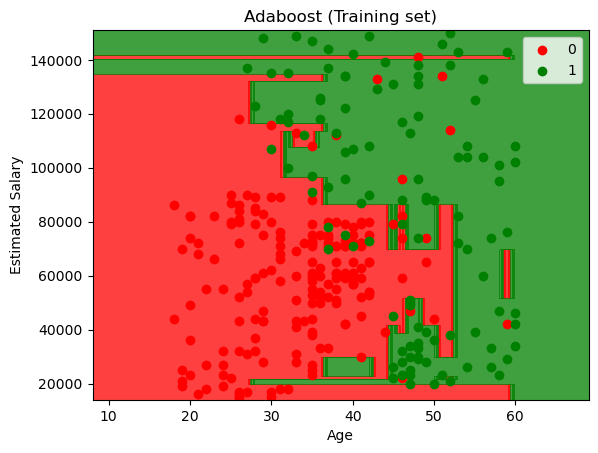

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Adaboost (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\vhst1\AppData\Local\Temp\ipykernel_6940\241955713.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


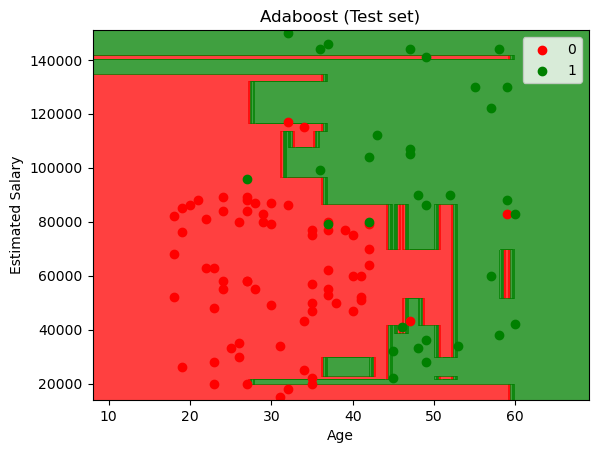

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Adaboost (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Bagging Classifier

In [17]:
classifier = BaggingClassifier()
classifier.fit(X_train, y_train)

BaggingClassifier()

In [18]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [19]:
y_pred = classifier.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[63  5]
 [ 4 28]]


0.91

### Visualização

C:\Users\vhst1\AppData\Local\Temp\ipykernel_6940\3014842804.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


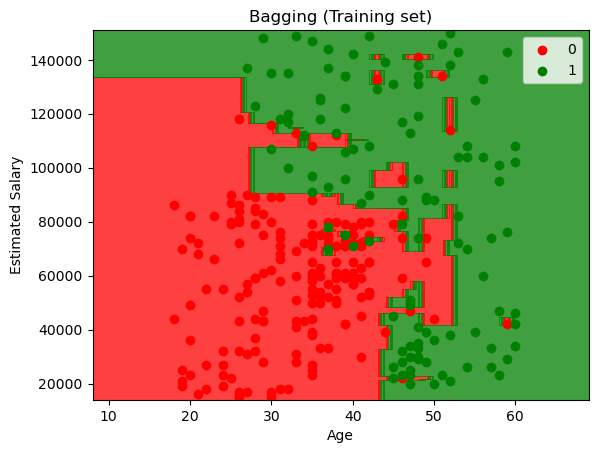

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Bagging (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\vhst1\AppData\Local\Temp\ipykernel_6940\287967026.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


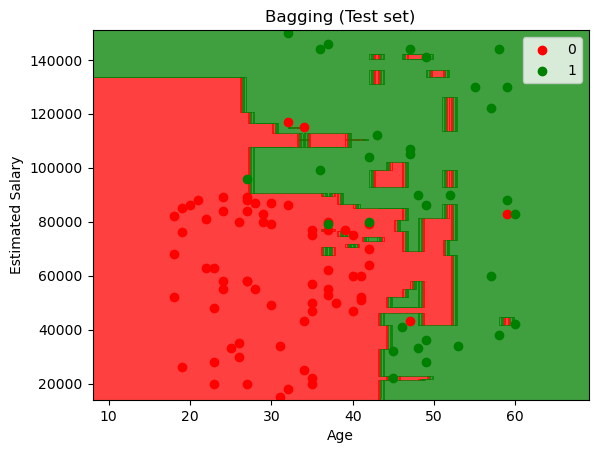

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Bagging (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3) Iris Dataset

In [23]:
# Importa o dataset do Iris direto do sklearn
loadiris = datasets.load_iris(as_frame=True)
df_iris = pd.concat((pd.DataFrame(loadiris.data),pd.DataFrame(loadiris.target)), axis=1)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


In [24]:
# Visualizando nosso Dataset
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
df_iris['target'] = df_iris['target'].apply(lambda x: 1 if x == 1 or x == 2 else 0)

In [26]:
df_iris['target'].value_counts()

1    100
0     50
Name: target, dtype: int64

In [27]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_iris.iloc[:, 0:-1].values

# pega os valores da última coluna e guarda em um vetor Y
Y = df_iris.iloc[:, -1].values

# imprime as 5 primeiras linhas da matriz X
print('X:', X[0:5,:])

# imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Y: [0 0 0 0 0]


### Aplicando o PCA

In [28]:
# Dividindo em Train Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [29]:
# Normalização dos dados por padronização
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Aplicar PCA no X_train e X_test ( 2 componentes )
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [31]:
# Classificador GradientBoosting com 10 estimators
classifier = GradientBoostingClassifier(n_estimators = 10)
classifier.fit(X_train_pca, y_train)

GradientBoostingClassifier(n_estimators=10)

In [32]:
# Verificando a metrica
y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0]
 [ 0 19]]


1.0

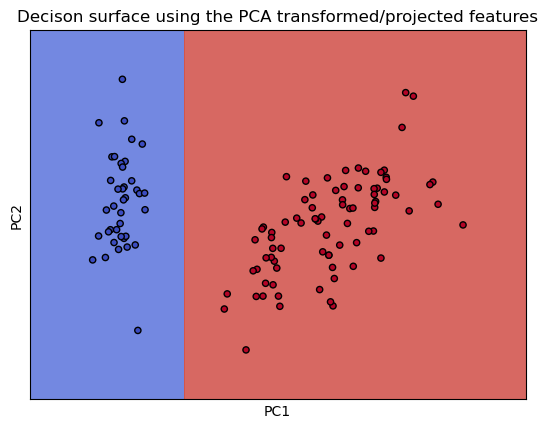

In [33]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

y = y_train
fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, classifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.show()

## Exercício com o Dataset data3

In [34]:
# Importando o dataset
df_3 = pd.read_csv('datasets/data3.csv', names=['FT1', 'FT2', 'Target'])

In [35]:
df_3

,FT1,FT2,Target
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1
...,...,...,...
206,-0.399885,-0.621930,1
207,-0.124078,-0.126608,1
208,-0.316935,-0.228947,1
209,-0.294124,-0.134795,0


In [36]:
df_3.Target.value_counts()

1    106
0    105
Name: Target, dtype: int64

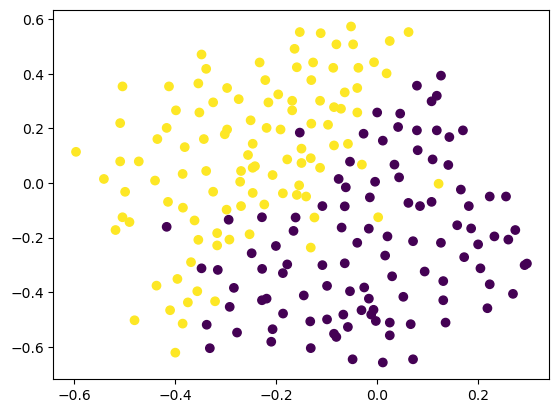

In [37]:
plt.scatter(df_3.iloc[:,0], df_3.iloc[:,1], c=df_3.iloc[:,2])

In [38]:
X = df_3.iloc[:, 0:-1].values
y = df_3.iloc[:, -1].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
# Criando Classificador com ensemble a escolha
classifier1 = AdaBoostClassifier(n_estimators = 100)
classifier1.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [41]:
classifier2 = RandomForestClassifier(n_estimators = 100)
classifier2.fit(X_train, y_train)

RandomForestClassifier()

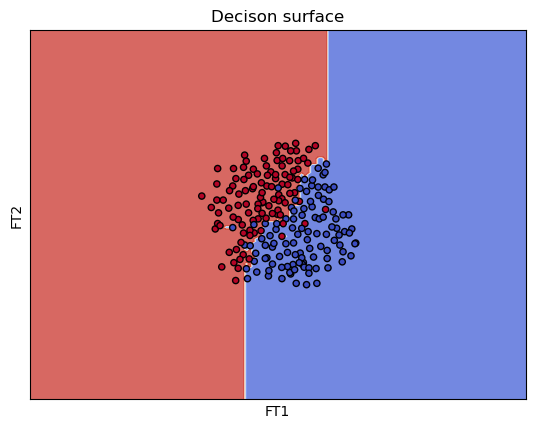

In [42]:
y = df_3.iloc[:,-1]
fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = df_3.iloc[:,0], df_3.iloc[:,1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, classifier2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('FT2')
ax.set_xlabel('FT1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface')
plt.show()

In [43]:
df_3_val = pd.read_csv('datasets/data3_val.csv', names=['FT1', 'FT2', 'Target'])

In [44]:
df_3_val

,FT1,FT2,Target
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0
...,...,...,...
195,0.005203,-0.544449,1
196,0.176352,-0.572454,0
197,0.127651,-0.340938,0
198,0.248682,-0.497502,0


In [45]:
# Verificando a metrica
from sklearn.metrics import classification_report

In [46]:
y_pred1 = classifier1.predict(X_test)

In [47]:
y_pred2 = classifier2.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.85      0.96      0.90        24

    accuracy                           0.88        43
   macro avg       0.89      0.87      0.88        43
weighted avg       0.89      0.88      0.88        43



In [49]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.89      1.00      0.94        24

    accuracy                           0.93        43
   macro avg       0.94      0.92      0.93        43
weighted avg       0.94      0.93      0.93        43



In [50]:
X_val = df_3_val.iloc[:, 0:-1].values
y_val = df_3_val.iloc[:, -1].values

In [51]:
y_pred_val = classifier1.predict(X_val)

In [52]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       113
           1       0.89      0.84      0.86        87

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



In [53]:
y_pred_val2 = classifier2.predict(X_val)

In [54]:
print(classification_report(y_val, y_pred_val2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       113
           1       0.94      0.91      0.92        87

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



## Exercício dataset Titanic

In [55]:
# Importando o csv para um pandas dataframe
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [56]:
# Pandas get Dummies
dummies = pd.get_dummies(df['Sex'])

In [57]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [58]:
# Novo dataframe com os dummies
df_novo = pd.concat([df, dummies], axis='columns')

In [59]:
df_novo

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1,1,0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1,0,1


In [60]:
# Remoção de colunas não relevantes
df_novo.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], axis='columns', inplace=True)

In [61]:
df_novo

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,female,male
0,3,22.0,1,0,7.2500,S,0,0,1
1,1,38.0,1,0,71.2833,C,1,1,0
2,3,26.0,0,0,7.9250,S,1,1,0
3,1,35.0,1,0,53.1000,S,1,1,0
4,3,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,0,0,1
887,1,19.0,0,0,30.0000,S,1,1,0
888,3,NaN,1,2,23.4500,S,0,1,0
889,1,26.0,0,0,30.0000,C,1,0,1


In [62]:
# Visulizando os dados, realizando possíveis transformações
df_novo['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [63]:
df_novo['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
df_novo['Embarked'] = df_novo['Embarked'].fillna('S')

In [65]:
df_novo

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,female,male
0,3,22.0,1,0,7.2500,S,0,0,1
1,1,38.0,1,0,71.2833,C,1,1,0
2,3,26.0,0,0,7.9250,S,1,1,0
3,1,35.0,1,0,53.1000,S,1,1,0
4,3,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,0,0,1
887,1,19.0,0,0,30.0000,S,1,1,0
888,3,NaN,1,2,23.4500,S,0,1,0
889,1,26.0,0,0,30.0000,C,1,0,1


In [66]:
# Instanciando o labelEncoder
le = LabelEncoder()

df_novo['Embarked'] = le.fit_transform(df_novo['Embarked'])

In [67]:
df_novo

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,female,male
0,3,22.0,1,0,7.2500,2,0,0,1
1,1,38.0,1,0,71.2833,0,1,1,0
2,3,26.0,0,0,7.9250,2,1,1,0
3,1,35.0,1,0,53.1000,2,1,1,0
4,3,35.0,0,0,8.0500,2,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,2,0,0,1
887,1,19.0,0,0,30.0000,2,1,1,0
888,3,NaN,1,2,23.4500,2,0,1,0
889,1,26.0,0,0,30.0000,0,1,0,1


In [68]:
df_novo['Age'] = df_novo['Age'].fillna(df_novo.Age.mean())

In [69]:
df_novo

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,female,male
0,3,22.000000,1,0,7.2500,2,0,0,1
1,1,38.000000,1,0,71.2833,0,1,1,0
2,3,26.000000,0,0,7.9250,2,1,1,0
3,1,35.000000,1,0,53.1000,2,1,1,0
4,3,35.000000,0,0,8.0500,2,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,2,0,0,1
887,1,19.000000,0,0,30.0000,2,1,1,0
888,3,29.699118,1,2,23.4500,2,0,1,0
889,1,26.000000,0,0,30.0000,0,1,0,1


In [70]:
# Divisão em train test val
X_train, X_test, y_train, y_test = train_test_split(df_novo.drop(columns=['Survived']), df_novo.Survived.values, test_size=0.15, random_state = 0)

In [71]:
len(X_train)

757

In [72]:
len(X_test)

134

In [73]:
# Normalização dos dados por padronização
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [74]:
# Aplicando PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [75]:
# Escolhendo um método
classifier1 = GradientBoostingClassifier(n_estimators = 100)
classifier1.fit(X_train_pca, y_train)

GradientBoostingClassifier()

In [76]:
y_pred1 = classifier1.predict(X_test_pca)

In [77]:
# Verificando a metrica
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        79
           1       0.77      0.67      0.72        55

    accuracy                           0.78       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.78      0.78      0.78       134



In [78]:
classifier2 = GradientBoostingClassifier(n_estimators = 100)
classifier2.fit(X_train_norm, y_train)

GradientBoostingClassifier()

In [79]:
y_pred2 = classifier2.predict(X_test_norm)

In [80]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        79
           1       0.92      0.65      0.77        55

    accuracy                           0.84       134
   macro avg       0.86      0.81      0.82       134
weighted avg       0.85      0.84      0.83       134



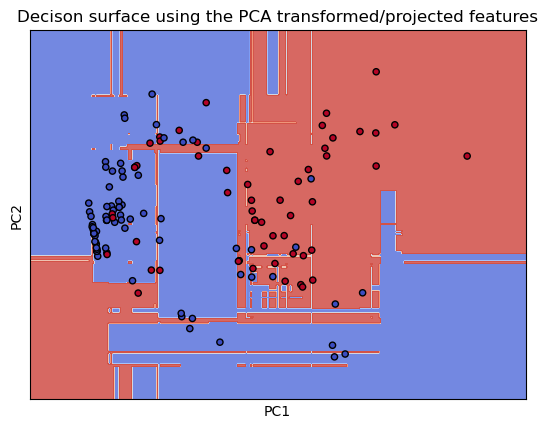

In [81]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

y = y_test
fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, classifier1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.show()

## Exercício dataset Wine ( direto do sklearn )

$ from sklearn import datasets

$ wine = datasets.load_wine()

In [82]:
# Carregando o dataset
wine = datasets.load_wine(as_frame=True)

In [83]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [84]:
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [85]:
X = wine.data.values
y = wine.target.values

In [86]:
# Normalização dos dados
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [87]:
# Aplicar PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_norm)

In [88]:
# Divisão Train test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state = 0)

In [89]:
voting_classifier = VotingClassifier([('KNN', KNeighborsClassifier()), 
                                      ('TREE', DecisionTreeClassifier()), 
                                      ('SVM', SVC())])

In [90]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('TREE', DecisionTreeClassifier()),
                             ('SVM', SVC())])

In [91]:
# Validação com Voting
y_pred = voting_classifier.predict(X_test)

In [92]:
# Verificando a metrica
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



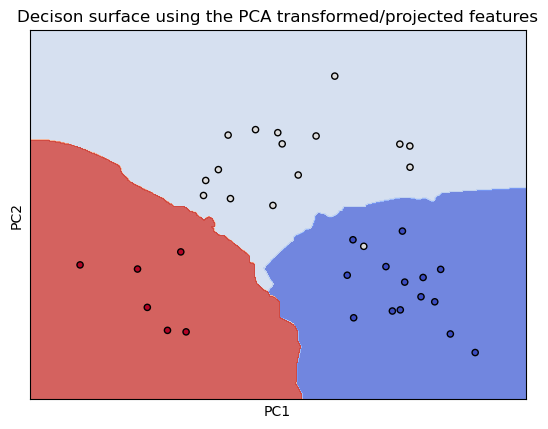

In [94]:
# Plotando
y = y_test
fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = X_test[:, 0], X_test[:, 1] # ATENÇÃO: Validar se seu X_test com PCA tem o mesmo nome
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, voting_classifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.show()

In [95]:
params_grid = {
    'KNN__n_neighbors': [3,5,7],
    'TREE__criterion': ['gini', 'entropy'],
    'SVM__C': [1,10,100],
    'SVM__kernel': ['linear', 'rbf']
}

In [96]:
grid_classifier = GridSearchCV(voting_classifier, param_grid = params_grid, verbose=1)

In [97]:
grid_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=VotingClassifier(estimators=[('KNN',
                                                     KNeighborsClassifier()),
                                                    ('TREE',
                                                     DecisionTreeClassifier()),
                                                    ('SVM', SVC())]),
             param_grid={'KNN__n_neighbors': [3, 5, 7], 'SVM__C': [1, 10, 100],
                         'SVM__kernel': ['linear', 'rbf'],
                         'TREE__criterion': ['gini', 'entropy']},
             verbose=1)

In [98]:
grid_classifier.best_params_

{'KNN__n_neighbors': 5,
 'SVM__C': 1,
 'SVM__kernel': 'linear',
 'TREE__criterion': 'gini'}

In [99]:
print(round(grid_classifier.best_score_, 5))

0.97217


## Dataset Dígitos

In [100]:
# Carregando o dataset de dígitos
d_digits = datasets.load_digits(as_frame=True)

In [101]:
d_digits

{'data':       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0           0.0        0.0        5.0       13.0        9.0        1.0   
 1           0.0        0.0        0.0       12.0       13.0        5.0   
 2           0.0        0.0        0.0        4.0       15.0       12.0   
 3           0.0        0.0        7.0       15.0       13.0        1.0   
 4           0.0        0.0        0.0        1.0       11.0        0.0   
 ...         ...        ...        ...        ...        ...        ...   
 1792        0.0        0.0        4.0       10.0       13.0        6.0   
 1793        0.0        0.0        6.0       16.0       13.0       11.0   
 1794        0.0        0.0        1.0       11.0       15.0        1.0   
 1795        0.0        0.0        2.0       10.0        7.0        0.0   
 1796        0.0        0.0       10.0       14.0        8.0        1.0   
 
       pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        

In [102]:
df = pd.DataFrame(d_digits.data)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [103]:
# Visualização dos dados
im = df.iloc[39,:].values

In [104]:
im_r = im.reshape(8,8)

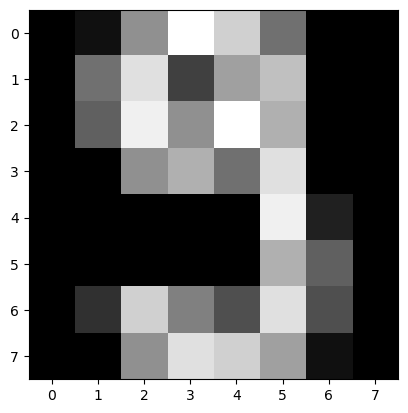

In [105]:
plt.imshow(im_r, cmap='gray')

In [106]:
d_digits.images.shape

(1797, 8, 8)

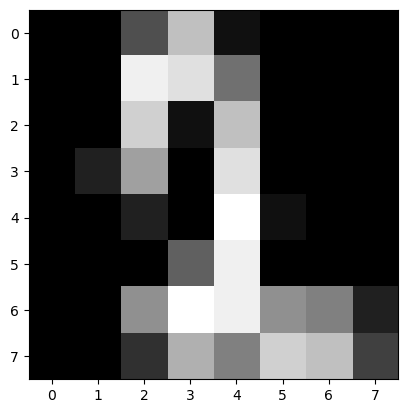

In [107]:
plt.imshow(d_digits.images[12], cmap='gray')

In [108]:
df['target'] = d_digits.target

In [109]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [110]:
# Predict sem PCA
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.2, random_state=42)

In [111]:
voting_classifier_digit = VotingClassifier([('KNN', KNeighborsClassifier()), 
                                      ('TREE', DecisionTreeClassifier()), 
                                      ('SVM', SVC())])

In [112]:
params_grid = {
    'KNN__n_neighbors': [5, 7, 9],
    'TREE__max_depth': [1, 60, 100],
    'TREE__criterion': ['gini', 'entropy'],
    'SVM__C': [1,10,100],
    'SVM__gamma': [1,10,100],
    'SVM__kernel': ['linear', 'rbf']
}

In [113]:
grid_classifier = GridSearchCV(voting_classifier_digit, param_grid = params_grid, verbose=1)

In [ ]:
grid_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
grid_classifier.best_params_

In [ ]:
print(round(grid_classifier.best_score_, 5))

In [ ]:
y_pred = grid_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

## Exercício com dataset data_cancer (comparação)

In [ ]:
# Dataset data_cancer.csv 
#leitura

In [ ]:
#normaliza

In [ ]:
#split

In [ ]:
#Testes
# Resultado(classification_report) AdaBoostClassifier
# Resultado(classification_report) BaggingClassifier
# Resultado(classification_report) Gridsearch do Voting com KNN, DescicionTree e SVM
# Params_grid: 1 KNN, 2 tress, 3 SVM - Valores diferentes da aula ;)

## Exercício de classificação de textos (Tweets)

In [ ]:
# Lendo o Dataset
tweet_data = pd.read_csv("nlp-getting-started/train.csv")
tweet_data.head()

In [ ]:
tweet_data.target.value_counts()

In [ ]:
tweet_data.drop(columns = ['id', 'keyword', 'location'], inplace = True)

In [ ]:
tweet_data.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_vect = CountVectorizer(stop_words = 'english')

In [ ]:
bow_tweet = bow_vect.fit_transform(tweet_data.text) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow_tweet, tweet_data.target, test_size = 0.2, random_state = 0)

In [ ]:
classifier = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
classifier.score(X_test, y_test)

In [ ]:
x_test = ['Earthquake !! Storm Approaching', 'Amazon big deal approaches!']

In [ ]:
x_test_trans = bow_vect.transform(x_test) 

In [ ]:
classifier.predict(x_test_trans)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweet_data.text, tweet_data.target, test_size = 0.2, random_state = 0)

In [ ]:
test_pipe = Pipeline(steps = [('bow', CountVectorizer(stop_words = 'english')),('boost', GradientBoostingClassifier())])

In [ ]:
test_pipe.fit(X_train, y_train)

In [ ]:
test_pipe.predict(x_test)

In [ ]:
params_grid = {
    'bow__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'boost__n_estimators': [10, 100]
}

In [ ]:
text_grid = GridSearchCV(test_pipe, param_grid = params_grid, verbose = 1)
text_grid.fit(X_train, y_train)

In [ ]:
text_grid.best_params_

In [ ]:
text_grid.best_score_

In [ ]:
voting_classifier_tweet = VotingClassifier([('KNN', KNeighborsClassifier()), 
                                      ('TREE', DecisionTreeClassifier()), 
                                      ('SVM', SVC())])

In [ ]:
test_pipe = Pipeline(steps = [('bow', CountVectorizer(stop_words = 'english')),('vooting', voting_classifier_tweet)])

In [ ]:
params_grid = {
    'bow__ngram_range': [(1, 1), (1, 2)],
    'vooting__KNN__n_neighbors': [5, 7],
    'vooting__TREE__max_depth': [10, 60],
    'vooting__SVM__C': [1, 10,100]
}

In [ ]:
test_voting = GridSearchCV(test_pipe, param_grid = params_grid, verbose = 1, scoring = 'f1')

In [ ]:
test_voting.fit(X_train, y_train)

In [ ]:
test_voting.best_params_

In [ ]:
test_voting.best_score_